In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
application_record = pd.read_csv("application_record.csv")
credit_record=pd.read_csv("credit_record.csv")

In [3]:
application_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1,1.0,0.0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1,1.0,0.0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1,0.0,0.0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,NaN,1,0.0,1.0,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1,0.0,1.0,1,Sales staff,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717.0,365243.0,1,0.0,0.0,0,NaN,1
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939.0,-3007.0,1,0.0,0.0,0,Laborers,1
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169.0,-372.0,1,1.0,0.0,0,Sales staff,1
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673.0,365243.0,1,0.0,0.0,0,NaN,2


In [4]:
credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0.0,X
1,5001711,-1.0,0
2,5001711,-2.0,0
3,5001711,-3.0,0
4,5001712,0.0,C
...,...,...,...
1048570,5150487,-25.0,C
1048571,5150487,-26.0,C
1048572,5150487,-27.0,C
1048573,5150487,-28.0,C


In [5]:
credit_record.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

In [6]:
application_record.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [7]:
credit_record['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [8]:
credit_record['STATUS'] = credit_record['STATUS'].replace('X', 6)
credit_record['STATUS'] = credit_record['STATUS'].replace('C', 7)

In [9]:
credit_record['MONTHS_BALANCE'].unique()

array([  0.,  -1.,  -2.,  -3.,  nan,  -4.,  -5.,  -6.,  -7.,  -8.,  -9.,
       -10., -11., -12., -13., -14., -15., -16., -17., -18., -19., -20.,
       -21., -22., -23., -24., -25., -26., -27., -28., -29., -30., -31.,
       -32., -33., -34., -35., -36., -37., -38., -39., -40., -42., -43.,
       -44., -45., -46., -47., -48., -49., -50., -51., -52., -53., -54.,
       -55., -56., -57., -58., -59., -41., -60.])

In [10]:
final = pd.merge(application_record, credit_record, how='left', on=['ID'])
final

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1,1.0,0.0,0,NaN,2,0.0,7
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1,1.0,0.0,0,NaN,2,-1.0,7
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1,1.0,0.0,0,NaN,2,-2.0,7
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1,1.0,0.0,0,NaN,2,-3.0,7
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1,1.0,0.0,0,NaN,2,-4.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179810,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717.0,365243.0,1,0.0,0.0,0,NaN,1,NaN,NaN
1179811,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939.0,-3007.0,1,0.0,0.0,0,Laborers,1,NaN,NaN
1179812,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169.0,-372.0,1,1.0,0.0,0,Sales staff,1,NaN,NaN
1179813,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673.0,365243.0,1,0.0,0.0,0,NaN,2,NaN,NaN


In [11]:
final.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
MONTHS_BALANCE             61
STATUS                      8
dtype: int64

In [12]:
final.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR               16
FLAG_OWN_REALTY            51
CNT_CHILDREN                0
AMT_INCOME_TOTAL           32
NAME_INCOME_TYPE           37
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE         109
DAYS_BIRTH                344
DAYS_EMPLOYED             189
FLAG_MOBIL                  0
FLAG_WORK_PHONE            31
FLAG_PHONE                 40
FLAG_EMAIL                  0
OCCUPATION_TYPE        362928
CNT_FAM_MEMBERS             0
MONTHS_BALANCE         402100
STATUS                 402100
dtype: int64

In [13]:
final.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH             float64
DAYS_EMPLOYED          float64
FLAG_MOBIL               int64
FLAG_WORK_PHONE        float64
FLAG_PHONE             float64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS          int64
MONTHS_BALANCE         float64
STATUS                  object
dtype: object

In [14]:
for i in final.columns:
    print(i,final[i].unique())

ID [5008804 5008805 5008806 ... 6841878 6842765 6842885]
CODE_GENDER ['M' 'F']
FLAG_OWN_CAR ['Y' 'N' nan]
FLAG_OWN_REALTY ['Y' 'N' nan]
CNT_CHILDREN [ 0  1  3  2  4  5 14 19  7  9 12  6]
AMT_INCOME_TOTAL [ 427500.    112500.    270000.    283500.    135000.    130500.
  157500.    405000.    211500.    360000.    126000.    315000.
  247500.    297000.    225000.    166500.    216000.    255150.
  148500.    202500.     94500.    450000.    180000.     90000.
  765000.    382500.    144000.    229500.    292500.     74250.
   40500.    337500.    193500.    267750.    139500.     67500.
  252000.    900000.    115290.    279000.     76500.    234000.
   81000.    108000.     99000.    198000.          nan   45000.
  238500.    117000.    153000.   1350000.    445500.    495000.
   85500.    306000.    562500.    189000.    328500.    310500.
  540000.    171000.    675000.    121500.     72000.     65250.
  184500.    103500.    162000.    165150.     54000.    243000.
  256500.     33

NAME_FAMILY_STATUS ['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
NAME_HOUSING_TYPE ['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' nan 'Office apartment']
DAYS_BIRTH [-12005. -21474. -19110. ...  -8169.  -9738. -22257.]
DAYS_EMPLOYED [-4542. -1134.    nan ... -8300. -9020. -4884.]
FLAG_MOBIL [1]
FLAG_WORK_PHONE [ 1.  0. nan]
FLAG_PHONE [ 0.  1. nan]
FLAG_EMAIL [0 1]
OCCUPATION_TYPE [nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']
CNT_FAM_MEMBERS [ 2  1  5  3  4  6 15  7 20  9 11 14  8]
MONTHS_BALANCE [  0.  -1.  -2.  -3.  -4.  -5.  -6.  -7.  -8.  -9. -10. -11. -12. -13.
 -14. -15. -16. -17. -18. -19. -20. -21. -22. -23. -24. -25. -26. -27.
 -28. -29. -30. -31. -32. -33. -3

In [15]:
final['FLAG_OWN_CAR']=final['FLAG_OWN_CAR'].fillna(method="ffill")
final['FLAG_OWN_REALTY']=final['FLAG_OWN_REALTY'].fillna(method="ffill")
final['AMT_INCOME_TOTAL']=final['AMT_INCOME_TOTAL'].fillna(value=final['AMT_INCOME_TOTAL'].mean())
final['NAME_INCOME_TYPE']=final['NAME_INCOME_TYPE'].fillna(method="ffill")
final['FLAG_WORK_PHONE']=final['FLAG_WORK_PHONE'].fillna(method="ffill")
final['FLAG_PHONE']=final['FLAG_PHONE'].fillna(method="ffill")
final['NAME_HOUSING_TYPE']=final['NAME_HOUSING_TYPE'].fillna(method="ffill")
final['DAYS_BIRTH']=final['DAYS_BIRTH'].fillna(method="ffill")
final['DAYS_EMPLOYED']=final['DAYS_EMPLOYED'].fillna(method="ffill")
final['OCCUPATION_TYPE']=final['OCCUPATION_TYPE'].fillna(method="bfill")
final['MONTHS_BALANCE']=final['MONTHS_BALANCE'].fillna(method="ffill")
final['STATUS']=final['STATUS'].fillna(method="ffill")

In [16]:
final.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

In [17]:
final

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1,1.0,0.0,0,Security staff,2,0.0,7
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1,1.0,0.0,0,Security staff,2,-1.0,7
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1,1.0,0.0,0,Security staff,2,-2.0,7
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1,1.0,0.0,0,Security staff,2,-3.0,7
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1,1.0,0.0,0,Security staff,2,-4.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179810,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717.0,365243.0,1,0.0,0.0,0,Laborers,1,-13.0,0
1179811,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939.0,-3007.0,1,0.0,0.0,0,Laborers,1,-13.0,0
1179812,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169.0,-372.0,1,1.0,0.0,0,Sales staff,1,-13.0,0
1179813,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673.0,365243.0,1,0.0,0.0,0,Sales staff,2,-13.0,0


In [18]:
pd.set_option('display.max_columns', None)
obj_test=final.select_dtypes(include ='object')

In [19]:
class LabelEncoder:
    def __init__(self):
        self.labels = {}

    def fit_transform(self, y):
        unique_labels = set(y)
        for i, label in enumerate(unique_labels):
            self.labels[label] = i

        encoded_labels = []
        for label in y:
            encoded_labels.append(self.labels[label])

        return encoded_labels

    def inverse_transform(self, y):
        inv_labels = {v: k for k, v in self.labels.items()}

        decoded_labels = []
        for label in y:
            decoded_labels.append(inv_labels[label])

        return decoded_labels

In [20]:
encoded_test={}
for i in obj_test.columns:
    le = LabelEncoder()
    encoded_data_test = le.fit_transform(obj_test[i])
    encoded_test[i]=encoded_data_test
encoded_test
df_test=pd.DataFrame(encoded_test)
pd.set_option('display.max_columns', None)
df_test.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'STATUS'],
      dtype='object')

In [21]:
final.drop(final[['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'STATUS']], axis=1, inplace=True)

In [22]:
final

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
0,5008804,0,427500.0,-12005.0,-4542.0,1,1.0,0.0,0,2,0.0
1,5008804,0,427500.0,-12005.0,-4542.0,1,1.0,0.0,0,2,-1.0
2,5008804,0,427500.0,-12005.0,-4542.0,1,1.0,0.0,0,2,-2.0
3,5008804,0,427500.0,-12005.0,-4542.0,1,1.0,0.0,0,2,-3.0
4,5008804,0,427500.0,-12005.0,-4542.0,1,1.0,0.0,0,2,-4.0
...,...,...,...,...,...,...,...,...,...,...,...
1179810,6840104,0,135000.0,-22717.0,365243.0,1,0.0,0.0,0,1,-13.0
1179811,6840222,0,103500.0,-15939.0,-3007.0,1,0.0,0.0,0,1,-13.0
1179812,6841878,0,54000.0,-8169.0,-372.0,1,1.0,0.0,0,1,-13.0
1179813,6842765,0,72000.0,-21673.0,365243.0,1,0.0,0.0,0,2,-13.0


In [23]:
final_test = pd.concat([final, df_test], axis=1)
final_test

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,STATUS
0,5008804,0,427500.0,-12005.0,-4542.0,1,1.0,0.0,0,2,0.0,0,1,1,2,4,2,3,13,2
1,5008804,0,427500.0,-12005.0,-4542.0,1,1.0,0.0,0,2,-1.0,0,1,1,2,4,2,3,13,2
2,5008804,0,427500.0,-12005.0,-4542.0,1,1.0,0.0,0,2,-2.0,0,1,1,2,4,2,3,13,2
3,5008804,0,427500.0,-12005.0,-4542.0,1,1.0,0.0,0,2,-3.0,0,1,1,2,4,2,3,13,2
4,5008804,0,427500.0,-12005.0,-4542.0,1,1.0,0.0,0,2,-4.0,0,1,1,2,4,2,3,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179810,6840104,0,135000.0,-22717.0,365243.0,1,0.0,0.0,0,1,-13.0,0,0,1,1,0,3,4,1,7
1179811,6840222,0,103500.0,-15939.0,-3007.0,1,0.0,0.0,0,1,-13.0,1,0,0,2,0,1,4,1,7
1179812,6841878,0,54000.0,-8169.0,-372.0,1,1.0,0.0,0,1,-13.0,1,0,0,0,4,1,5,4,7
1179813,6842765,0,72000.0,-21673.0,365243.0,1,0.0,0.0,0,2,-13.0,1,0,1,1,0,0,4,4,7


In [24]:
int64=final_test.select_dtypes(include ='int64')
int64.columns

Index(['ID', 'CNT_CHILDREN', 'FLAG_MOBIL', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'STATUS'],
      dtype='object')

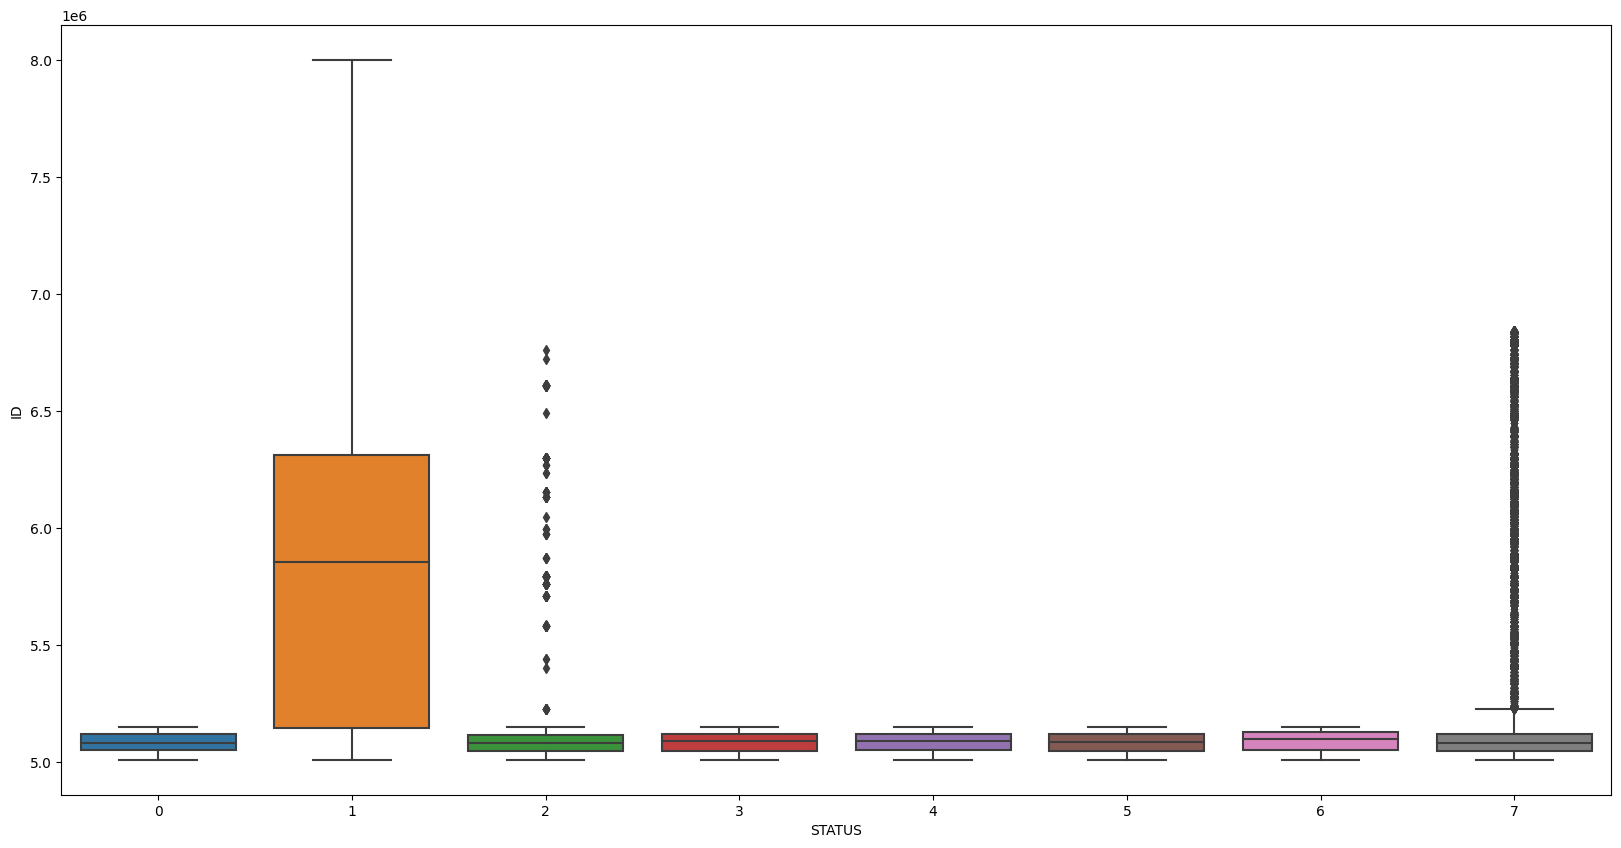

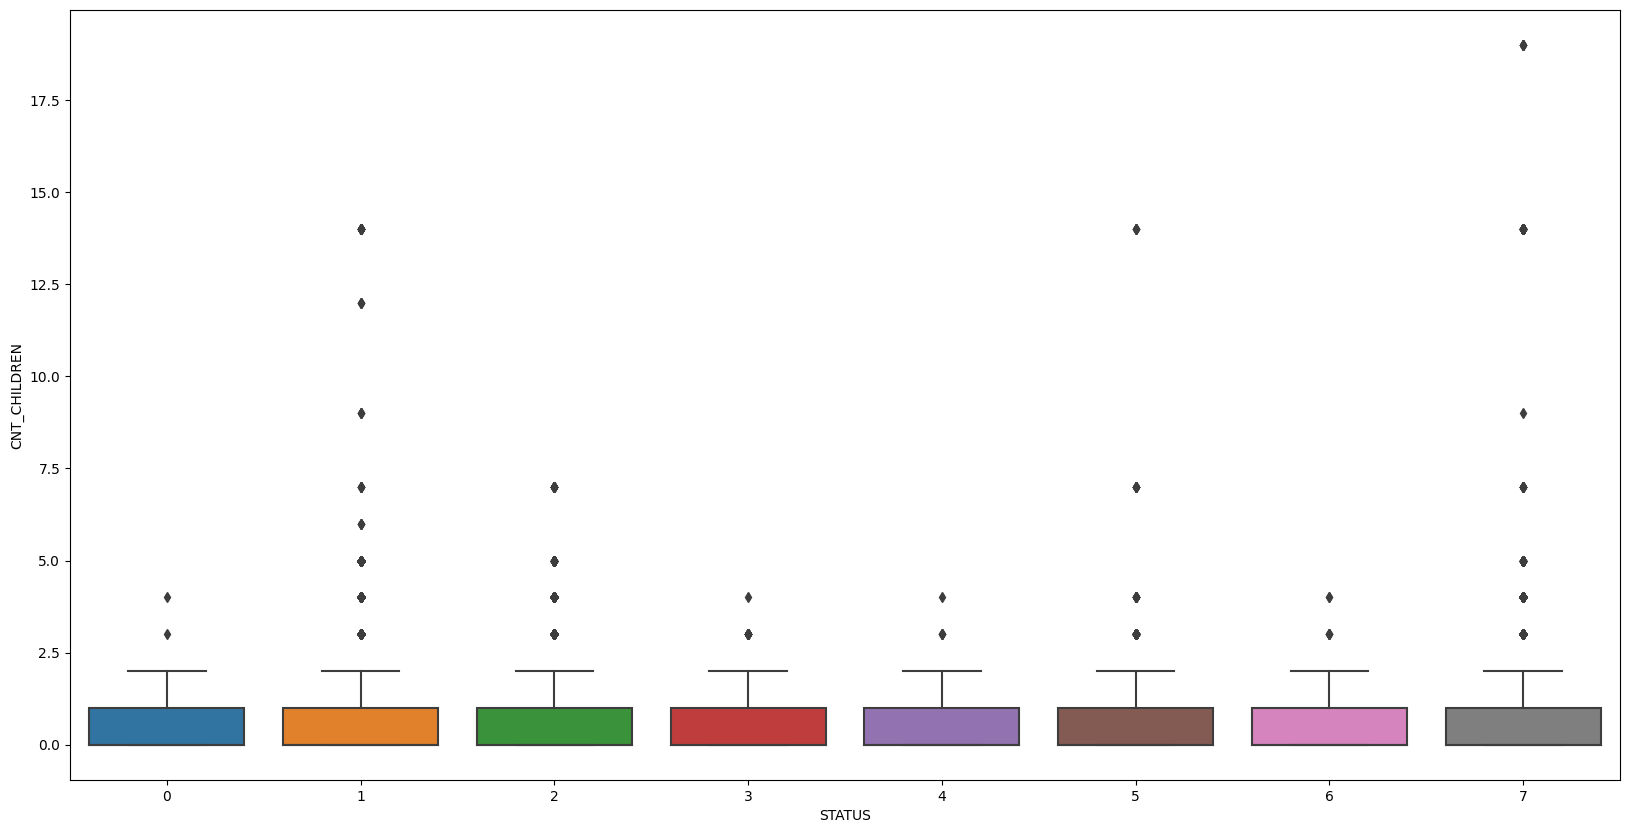

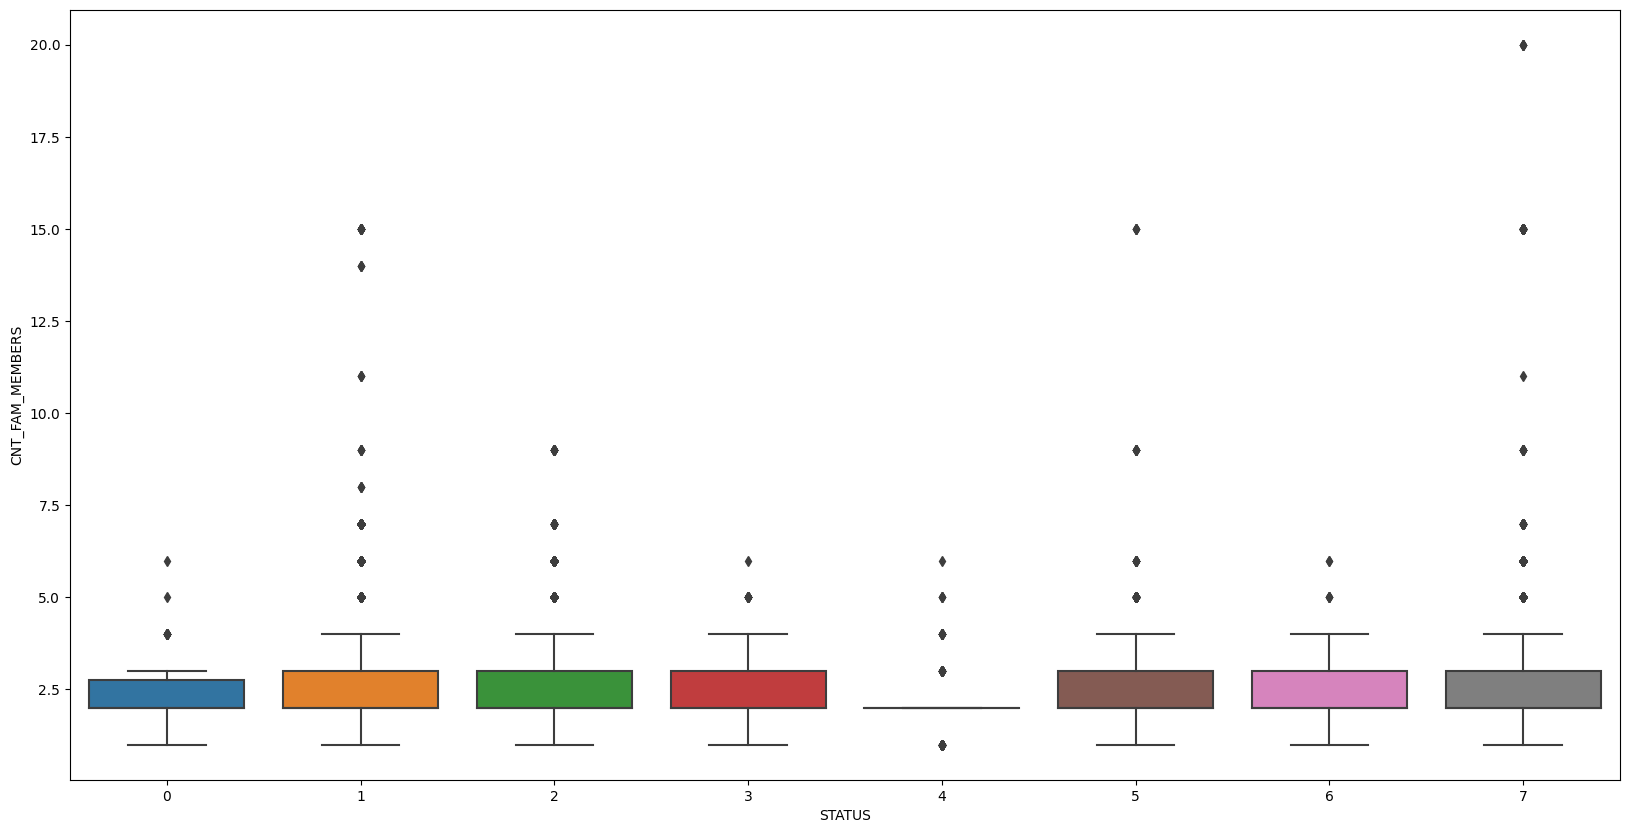

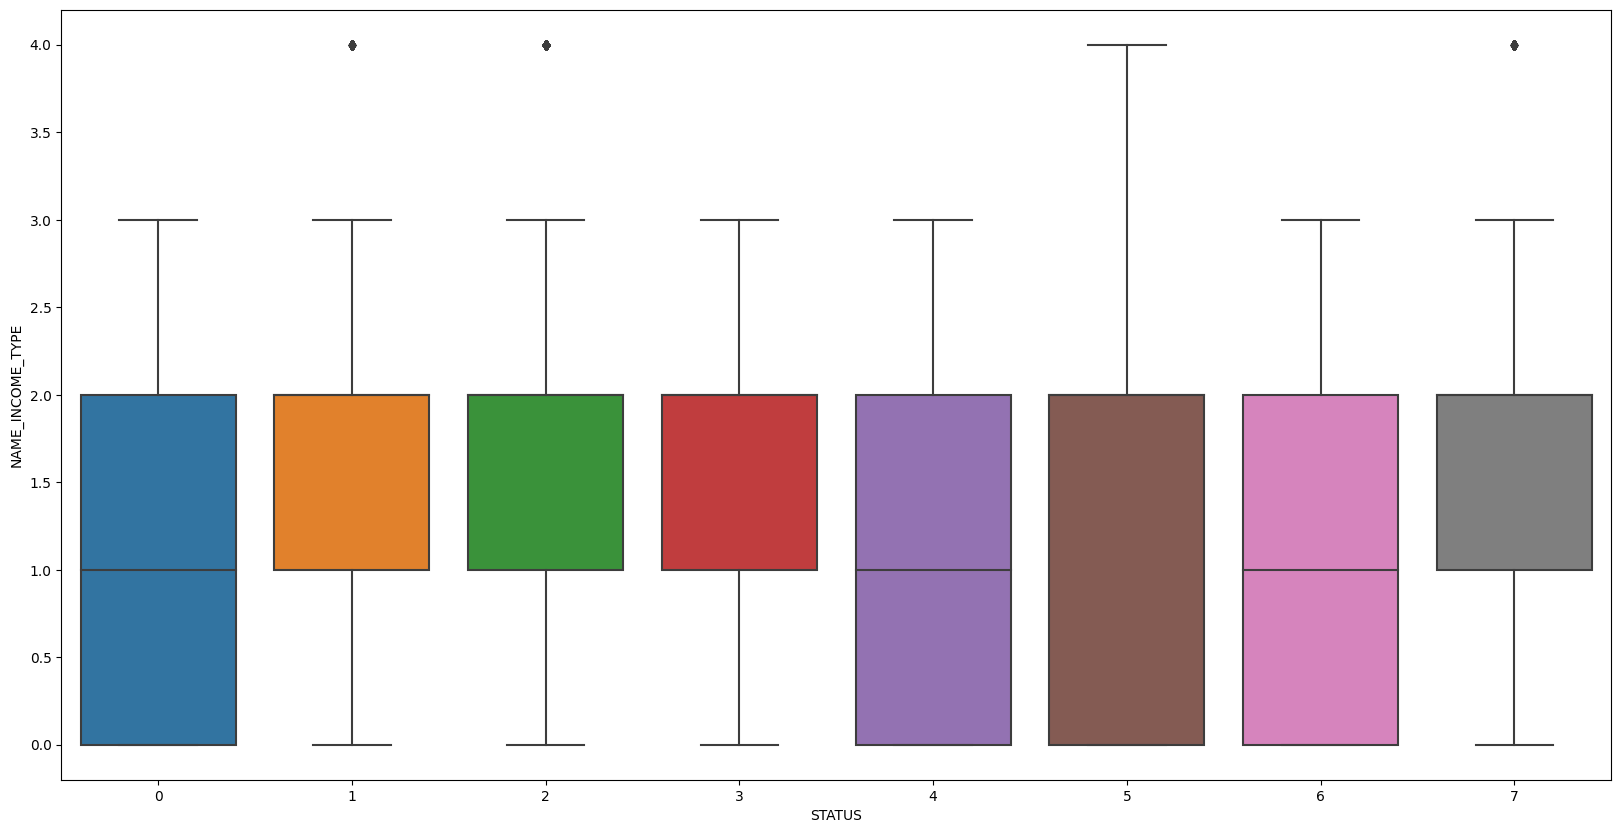

In [42]:
feature =['ID', 'CNT_CHILDREN','CNT_FAM_MEMBERS', 
          'NAME_INCOME_TYPE']

for i in feature:
    plt.figure(figsize=(20,10))
    sns.boxplot(x=final_test["STATUS"], y=int64[i])
    plt.show()

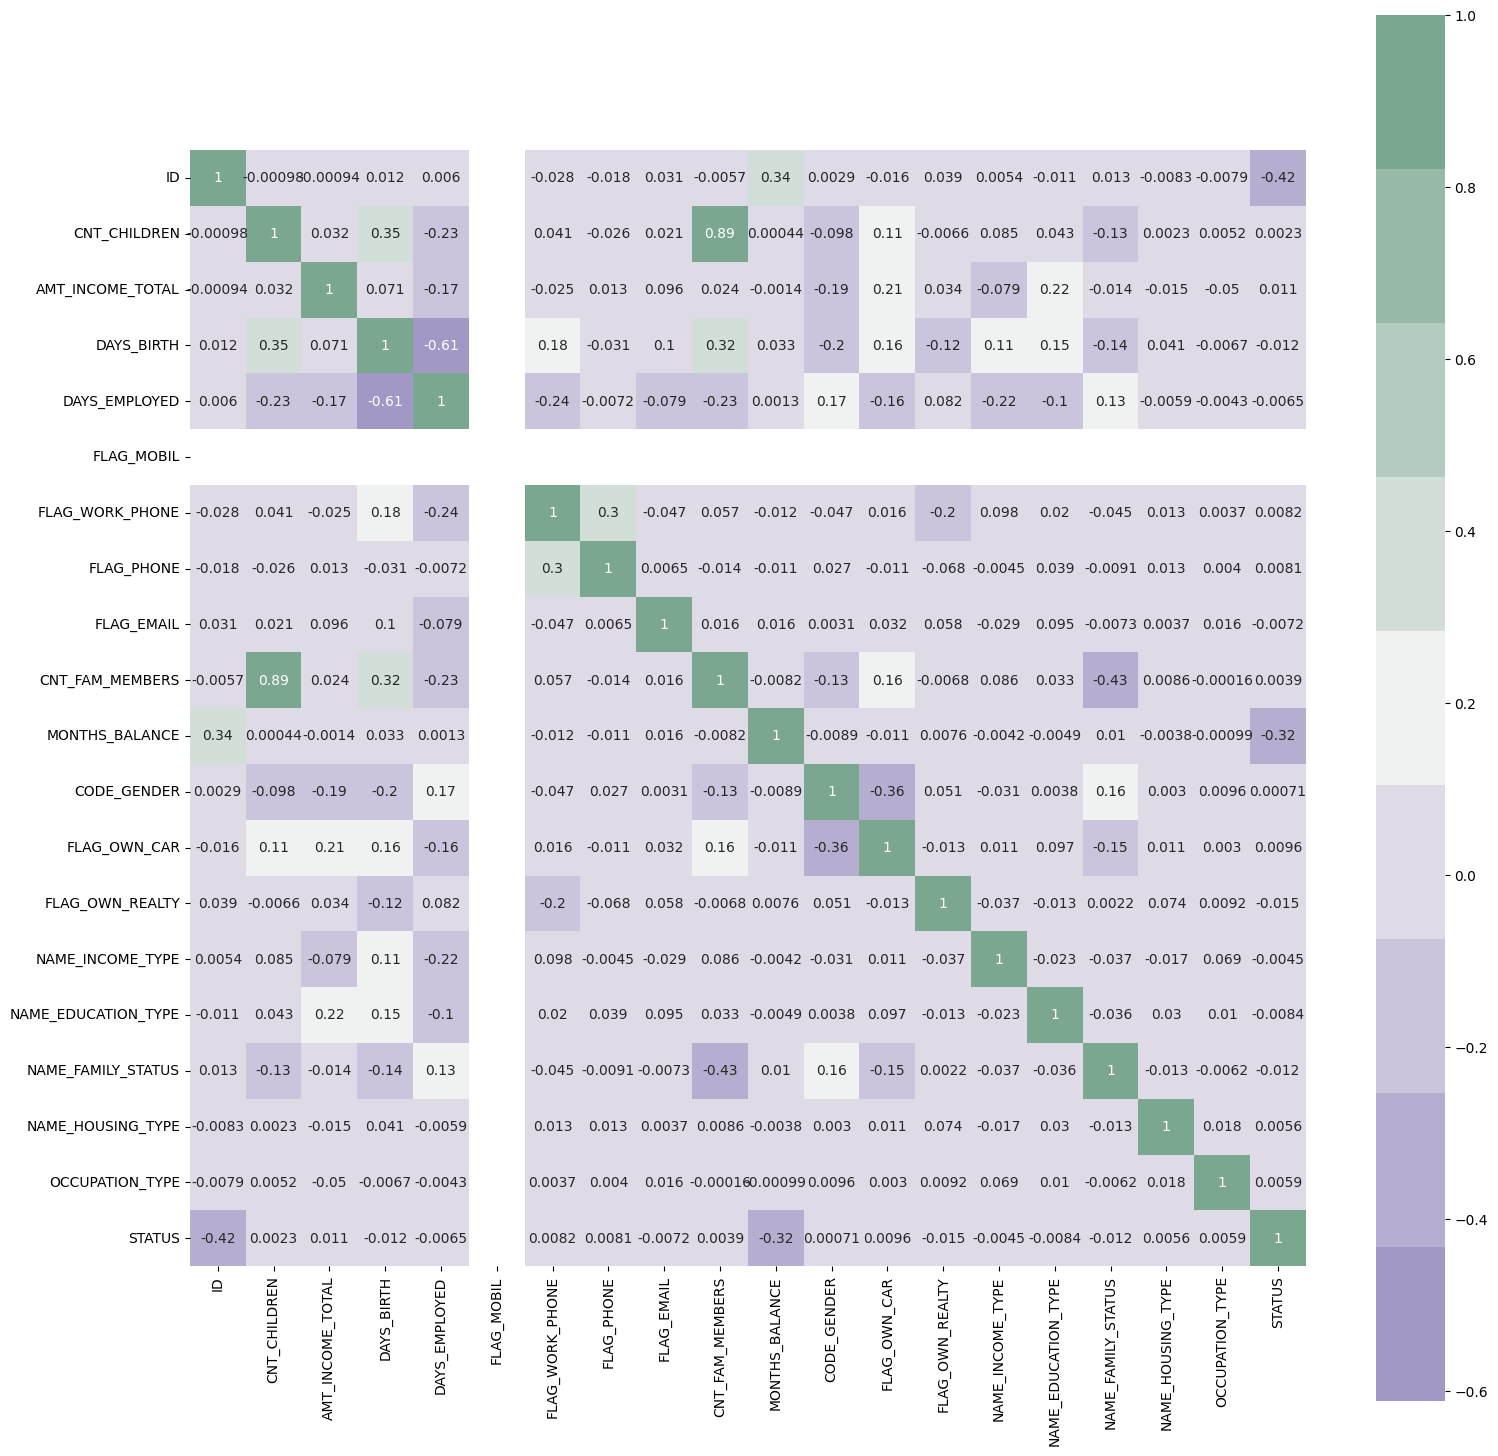

In [26]:
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = final_test.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);


<Axes: xlabel='STATUS', ylabel='count'>

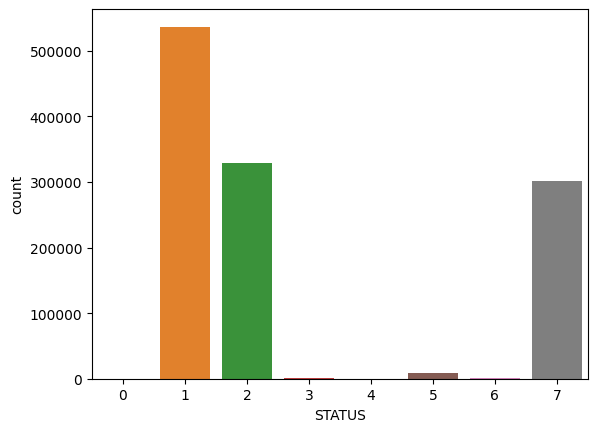

In [27]:
sns.countplot(x= final_test["STATUS"])

<Axes: xlabel='CNT_FAM_MEMBERS', ylabel='count'>

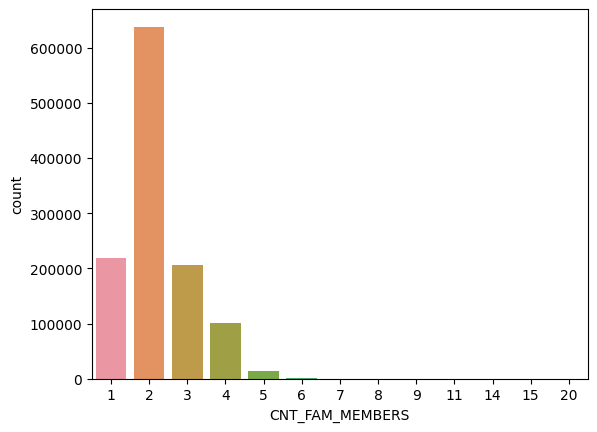

In [28]:
sns.countplot(x= final_test["CNT_FAM_MEMBERS"])

In [29]:
y=final_test['STATUS']
x=final_test.drop('STATUS',axis=1)
x

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,5008804,0,427500.0,-12005.0,-4542.0,1,1.0,0.0,0,2,0.0,0,1,1,2,4,2,3,13
1,5008804,0,427500.0,-12005.0,-4542.0,1,1.0,0.0,0,2,-1.0,0,1,1,2,4,2,3,13
2,5008804,0,427500.0,-12005.0,-4542.0,1,1.0,0.0,0,2,-2.0,0,1,1,2,4,2,3,13
3,5008804,0,427500.0,-12005.0,-4542.0,1,1.0,0.0,0,2,-3.0,0,1,1,2,4,2,3,13
4,5008804,0,427500.0,-12005.0,-4542.0,1,1.0,0.0,0,2,-4.0,0,1,1,2,4,2,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179810,6840104,0,135000.0,-22717.0,365243.0,1,0.0,0.0,0,1,-13.0,0,0,1,1,0,3,4,1
1179811,6840222,0,103500.0,-15939.0,-3007.0,1,0.0,0.0,0,1,-13.0,1,0,0,2,0,1,4,1
1179812,6841878,0,54000.0,-8169.0,-372.0,1,1.0,0.0,0,1,-13.0,1,0,0,0,4,1,5,4
1179813,6842765,0,72000.0,-21673.0,365243.0,1,0.0,0.0,0,2,-13.0,1,0,1,1,0,0,4,4


In [30]:
def train_test_split(X, y, test_ratio=0.2, random_state=None):
   
    if random_state is not None:
        np.random.seed(random_state)

    num_samples = X.shape[0]
    shuffle_idx = np.random.permutation(num_samples)
    test_size = int(num_samples * test_ratio)

    X_train = X.iloc[shuffle_idx[test_size:],:]
    y_train = y.iloc[shuffle_idx[test_size:]]
    X_test = X.iloc[shuffle_idx[:test_size],:]
    y_test = y.iloc[shuffle_idx[:test_size]]

    return X_train, X_test, y_train, y_test

In [31]:
X_train, X_test, y_train,y_test = train_test_split(x,y,test_ratio=0.2,random_state=42)
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
X_train

array([[5.105901e+06, 0.000000e+00, 1.125000e+05, ..., 0.000000e+00,
        5.000000e+00, 1.100000e+01],
       [5.731199e+06, 0.000000e+00, 1.260000e+05, ..., 1.000000e+00,
        4.000000e+00, 1.000000e+00],
       [5.068628e+06, 0.000000e+00, 2.160000e+05, ..., 0.000000e+00,
        4.000000e+00, 0.000000e+00],
       ...,
       [5.029211e+06, 0.000000e+00, 1.800000e+05, ..., 0.000000e+00,
        4.000000e+00, 1.000000e+00],
       [5.126268e+06, 2.000000e+00, 1.575000e+05, ..., 0.000000e+00,
        4.000000e+00, 1.200000e+01],
       [5.028702e+06, 0.000000e+00, 2.475000e+05, ..., 4.000000e+00,
        4.000000e+00, 0.000000e+00]])

In [32]:
def StandardScaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    a=((X - mean) / std)
    return a

In [33]:
StandardScaler(X_train).shape

(943852, 19)

In [34]:
StandardScaler(X_train).shape
StandardScaler(X_test)

array([[ 0.85389008, -0.57949333, -0.0786842 , ..., -0.56223988,
         0.15128383, -1.11152517],
       [-0.73144015, -0.57949333,  0.04809865, ...,  0.3283035 ,
        -4.18741732, -0.92243502],
       [-0.73136875, -0.57949333, -1.13520798, ..., -0.56223988,
         0.15128383,  1.34664675],
       ...,
       [-0.49878308, -0.57949333,  0.55523006, ..., -0.56223988,
         0.15128383, -0.92243502],
       [ 1.73385819, -0.57949333, -0.92390322, ...,  2.99993363,
         0.15128383,  0.96846646],
       [-0.70868226, -0.57949333, -1.26199083, ...,  2.99993363,
         0.15128383, -0.92243502]])

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import tensorflow as tf

from tensorflow import keras

from sklearn import preprocessing
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

from keras.utils import to_categorical

y_train_onehot = to_categorical(y_train, num_classes=8)


import tensorflow as tf
early_stop=tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.0001,
    patience=20,
    restore_best_weights=True
)

model = Sequential()
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 19))
model.add(Dense(15, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation = "softmax"))

model.compile(optimizer = 'adam', loss="categorical_crossentropy", metrics = ["accuracy"])

# Train the ANN
history = model.fit(X_train, y_train_onehot, batch_size = 128, epochs = 50, validation_split=0.2, callbacks=early_stop)



2023-03-10 09:54:45.369098: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-10 09:54:48.725974: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
5900/5900 [==============================] - 4s 711us/step - loss: 134.3241 - accuracy: 0.4476 - val_loss: 1.1255 - val_accuracy: 0.4541
Epoch 2/50
5900/5900 [==============================] - 4s 691us/step - loss: 2.5860 - accuracy: 0.4550 - val_loss: 1.1185 - val_accuracy: 0.4541
Epoch 3/50
5900/5900 [==============================] - 4s 696us/step - loss: 1.1166 - accuracy: 0.4551 - val_loss: 1.1183 - val_accuracy: 0.4541
Epoch 4/50
5900/5900 [==============================] - 4s 700us/step - loss: 1.1164 - accuracy: 0.4551 - val_loss: 1.1183 - val_accuracy: 0.4541
Epoch 5/50
5900/5900 [==============================] - 4s 700us/step - loss: 1.1164 - accuracy: 0.4551 - val_loss: 1.1183 - val_accuracy: 0.4541
Epoch 6/50
5900/5900 [==============================] - 4s 697us/step - loss: 1.1164 - accuracy: 0.4551 - val_loss: 1.1183 - val_accuracy: 0.4541
Epoch 7/50
5900/5900 [==============================] - 4s 721us/step - loss: 1.1164 - accuracy: 0.4551 - val_loss: 1.1183

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                320       
                                                                 
 dense_1 (Dense)             (None, 15)                255       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 128       
                                                                 
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________


In [37]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 45.41%


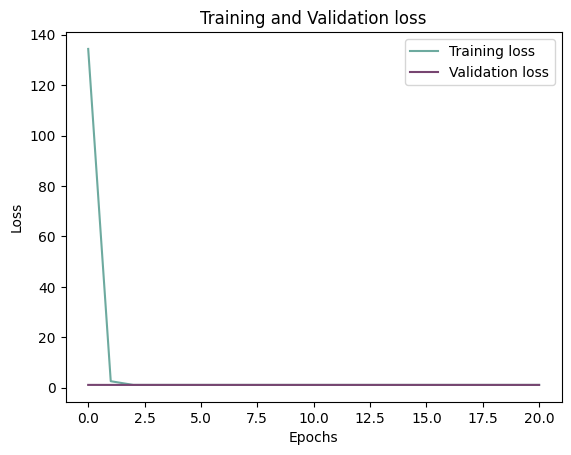

In [38]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

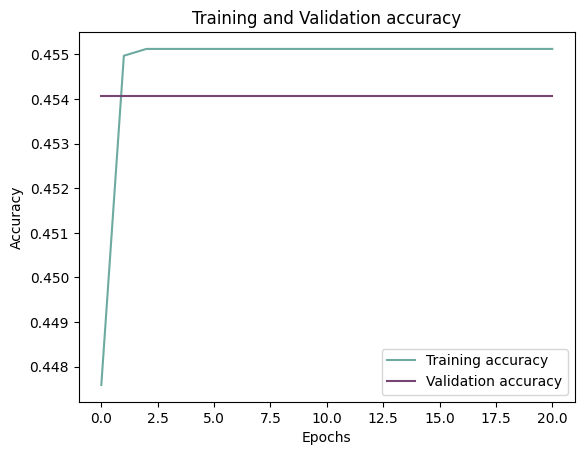

In [39]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
predict_x=model.predict(X_test) 
print(predict_x)
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

7374/7374 [==============================] - 3s 358us/step
[[0.00351224 0.44847044 0.2759453  ... 0.00725327 0.00346617 0.25518   ]
 [0.00351224 0.44847044 0.2759453  ... 0.00725327 0.00346617 0.25518   ]
 [0.00351224 0.44847044 0.2759453  ... 0.00725327 0.00346617 0.25518   ]
 ...
 [0.00351224 0.44847044 0.2759453  ... 0.00725327 0.00346617 0.25518   ]
 [0.00351224 0.44847044 0.2759453  ... 0.00725327 0.00346617 0.25518   ]
 [0.00351224 0.44847044 0.2759453  ... 0.00725327 0.00346617 0.25518   ]]
[1 1 1 ... 1 1 1]
